<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>

# **Artificial Intelligence - MSc**

## CS6512 - AI & Data Science Ecosystems - Theory and Practice
## SEM2 2022/3

### CS6512 Etivity 2 - Implementing a Layer Detector for Cryptocurrency Rates with AWS

### Instructor: Emil Vassev
April 20th, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: Paul
### Student Surname: Trayers
### Student ID: 8907021
### Date of Final Submission: Apr 21 2024
***

## Task
In this e-tivity, you will be granted with access to an AWS Academy Learner Lab, and asked to:
<ol>
<li>Follow the provided instructions to set up your AWS environment.</li>
<li>Implement an Outlier Detector for cryptocurrency rates by using the outlier-detection algorithms covered in class:
<ul>
<li>Enhanced Dixon Q</li>
<li>Mean & Standard Deviation</li>
<li>Isolation Forest</li>
<li>Boxplots Method</li>
<li>DBSCAN Clustering Method</li>
</ul></li>    
</ol>

Your outlier detector shall be implemented in Python and run on AWS SageMaker.

### Implementation Subtasks
This e-tivity has two distinct subtasks:
<ol>
    <li>Detecting outliers among cryptocurrency history rates</li>
    <li>Detecting outliers among cryptocurrency live-exchange rates</li>
</ol>    

### Subtask #1: Detecting outliers among cryptocurrency history rates
<ol>
<li>Use the AWS SageMaker to open a Jupyter Notebook and implement your assignment there.</li>
<li>Set up an S3 bucket, upload the **instrument_price.csv** file and use the provided interface to read from and write to this and othere files there.</li>
<li>Implement an outlier detector that runs on the AWS SageMaker and:
  <ul>
    <li>loads csv data from the AWS S3 storage space and produces an outlier report</li>
    <li>gets hystory rates from the marketplace CryptoCompare.com and produces an outlier report</li>
  </ul>
</li>
</ol>

### Subtask #2: Detecting outliers among cryptocurrency live-exchange rates
<ol>
<li>Implement a new feature of your Outlier Detector, so it will:
  <ol>
    <li>Get live-exchange cryptocurrency rates from the marketplace CryptoCompare.com on every 30 sec.</li>
    <li>Store these cryptocurrency rates.</li>
    <li>Detect outliers among these cryptocurrency rates.</li>
  </ol>
</li>
</ol>


## Note
<span style="color:blue">You will be provided with:</span>
  <ul>
    <li><span style="color:blue">implementation of the outlier-detection algorithms:</span>
      <ul>  
       <li>class DixonQEnhanced</li>
       <li>class StandardDeviationMethod</li>
       <li>class IsolationForestMethod</li>
       <li>class BoxPlotsMethod</li>
       <li>class DBScanClusteringMethod</li>
      </ul>    
    </li>
    <li><span style="color:blue">implementation of reading live-exchange rates from CryptoCompare.com:</span>
      <ul>  
       <li>class CryptoCompareReader</li>
      </ul>  
    </li>
    <li><span style="color:blue">a library making the communication with the s3 bucket transparent:</span>
      <ul>  
       <li>class S3Utils</li>
      </ul>  
    </li>
    <li><span style="color:blue">implementation of the structure of your code (class and methods) - you will need to follow this structure:</span>
      <ul>  
       <li>class CS6512Assignment2</li>
      </ul>
    </li>
  </ul>    

### Pseudo code for executePhase() method

    def executePhase(self, phase_num, series):
        while (True):
            
            #step #1: exit on series size < 3
            
            #step #2: if series size > 100 then create a series of 100 elements selected at random from series
        
            #step #3: joint_outliers_5 = "joint outliers of all 5 algorithms"      
        
            if "joint_outliers_5" is not empty:
                #step #4: self.produceJsonOutliers(arguments go here)

                break
            
            if phase_num == "phase_3":
                break

        return True

### Pseudo code for executeOnTimer() method

    def executeOnEvent(self, crypto_currency):
    
        while (True):
        
            check if 30 seconds have elapsed:
            
                reset the timer
       
                #step #1: if the csv file with live-exchange cryptocurrency rates exists then load the rates from this file
                       
                #step #2: get the current live-exchange rate for crypto_currency by using the CryptoCompareReader class  
        
                #step #3: add live_rate to series
        
                #step #4: write the updated series into a csv file with live-exchange cryptocurrency rates
                               
                #step #5: self.executePhase("phase_3", series)
                    
                break
            
        return True

### The extract100ElementsAtRandom() method
The Dixon Q works on series of elements with maximum size of 100 elements. Here if a series has a length larger than 100, we extract 100 elements at random. The 100-element series is processed by all the algorithms.  

## Testing

You are required to test your solution with the <span style="color:blue"><b>Solana</b></span> cryptocurrency (ticker = <span style="color:blue"><b>'SOL'</b></span>). Solana is the fastest blockchain in the world and the fastest growing ecosystem in cryptocurrency. Hence, it may have quite volatile exchange rates.

## What to deliver?

You are asked to deliver:
<ul>
<li>your solution: implemented in this notebook</li>
<li>your result files: check the <b>results</b> directory to see the file names and their structure</li>
</ul>

## A glimpse of your initial data

In [ ]:
import pandas as pd

#df = pd.read_csv ('data\instrument_price.csv') - original code
#df = s3_client.readCsvFileFromBucket('instrument_price.csv') - run above

df.head(10)

In [ ]:
dfCurrency = df.loc[df['instrument_ticker'] == 'SOL']

In [ ]:
dfCurrency['offer'].describe()

# Implementation

This sections contains our updated version of the template implementation. Here we have updated the S3Utils class to fix some issues, CS6512Assignment2 class to execute the code to run trials for Phase 1 from prices stored in S3 bucket, Phase 2 historical prices from CryptoCompare and Phase 3 live prices from CryptoCompare on a timer.

For each phase, trials will continue until a "successful" result is found comprising a non-empty joint set of outliers from the intersection of all 5 techniques. If the maximum defined number of trials is run without a "successful" result, then the results from the last trial are taken instead and the equivalent JSON created and stored to file and uploaded to the S3 bucket. 

In [1]:
!pip install boto3

import boto3
print("Boto3 version:", boto3.__version__)

import sys
print(sys.executable)

import sagemaker
from sagemaker import get_execution_role

sess = sagemaker.Session()
role = get_execution_role()
print(role)  # role that SM will use to access AWS resources (S3, CloudWatch)



Boto3 version: 1.34.93
/home/ec2-user/anaconda3/envs/python3/bin/python
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
arn:aws:iam::960701162063:role/service-role/SageMaker-DataScientist


In [2]:
import boto3

session = boto3.session.Session()
current_region = session.region_name
print("Current region:", current_region)

s3_client = boto3.client("s3")

# List all buckets to test permissions
#for bucket in s3_client.list_buckets()['Buckets']:
#    print(bucket['Name'])
    
# Specify the bucket name
AWS_S3_BUCKET = 'ptrayers-ul-cs6512'

# List all objects in the specified bucket
def list_bucket_contents(bucket):
    paginator = s3_client.get_paginator('list_objects_v2')
    for page in paginator.paginate(Bucket=bucket):
        for obj in page.get('Contents', []):
            print(obj['Key'])

# Call the function with your specific bucket name
print(f"Bucket name: {AWS_S3_BUCKET}..")
#list_bucket_contents(bucket_name)


Current region: eu-west-1
Bucket name: ptrayers-ul-cs6512..


### Libraries to Use

#### Method #1: Dixon Q Test

In [3]:
"""
Enhanced Dixon Q Test

@author: Emil Vassev
"""

from scipy.stats import shapiro

"""
 *
 * This class implements an enhanced version of DixonQ Test.
 * Provides a set of encoded critical values - up to 100.
 * The encoded critical values are used as a basis to generate critical values for other alphas (levels of confidence).
 * Both encoded and generated critical values are used to produce a result of maximum accuracy when identifying outliers.
 *
"""
class DixonQEnhanced:

    criticalValues = {}


    """
     * DixonQEnhanced constructor
    """
    def __init__(self):
        self.buildCriticalValues()
        
    """
     *
    """
    def getMethodName(self):
        return "DixonQ Enhanced Method"


    """
     * Builds a dictionary of critical values grouped by alpha
    """
    def buildCriticalValues(self):

        """
         * the critical values are grouped by an alpha key
         * alpha is the probability of incorrectly rejecting the suspected outlier
        """
        #encoded critical values for alpha = 0.3 (0.7% level of confidence)
        self.criticalValues[0.30] = [0,0,
                                     0.6836,0.4704,0.3730,0.3173,0.2811,0.2550,0.2361,0.2208,
                                     0.2086,0.1983,0.1898,0.1826,0.1764,0.1707,0.1656,0.1613,
                                     0.1572,0.1535,0.1504,0.1474,0.1446,0.1420,0.1397,0.1376,
                                     0.1355,0.1335,0.1318,0.1300,0.1283,0.1268,0.1255,0.1240,
                                     0.1227,0.1215,0.1202,0.1192,0.1181,0.1169,0.1160,0.1153,
                                     0.1141,0.1134,0.1124,0.1116,0.1108,0.1102,0.1093,0.1087,
                                     0.1079,0.1071,0.1067,0.1060,0.1052,0.1047,0.1041,0.1036,
                                     0.1030,0.1024,0.1019,0.1014,0.1009,0.1004,0.1000,0.0997,
                                     0.0991,0.0987,0.0982,0.0979,0.0974,0.0970,0.0967,0.0961,
                                     0.0960,0.0955,0.0952,0.0948,0.0943,0.0939,0.0937,0.0935,
                                     0.0930,0.0928,0.0925,0.0921,0.0918,0.0915,0.0913,0.0910,
                                     0.0906,0.0903,0.0902,0.0899,0.0896,0.0894,0.0892,0.0890,
                                     0.0887,0.0885]

        #encoded critical values for alpha = 0.2 (0.8% level of confidence)
        self.criticalValues[0.20] = [0,0,
                                     0.7808,0.5603,0.4508,0.3868,0.3444,0.3138,0.2915,0.2735,
                                     0.2586,0.2467,0.2366,0.2280,0.2202,0.2137,0.2077,0.2023,
                                     0.1973,0.1929,0.1890,0.1854,0.1820,0.1790,0.1761,0.1735,
                                     0.1710,0.1687,0.1664,0.1645,0.1624,0.1604,0.1590,0.1571,
                                     0.1555,0.1540,0.1525,0.1512,0.1499,0.1484,0.1472,0.1462,
                                     0.1449,0.1441,0.1430,0.1418,0.1408,0.1400,0.1390,0.1381,
                                     0.1374,0.1365,0.1357,0.1349,0.1340,0.1334,0.1326,0.1320,
                                     0.1312,0.1304,0.1299,0.1294,0.1286,0.1281,0.1275,0.1272,
                                     0.1264,0.1260,0.1254,0.1249,0.1243,0.1238,0.1234,0.1228,
                                     0.1225,0.1221,0.1217,0.1212,0.1205,0.1201,0.1198,0.1195,
                                     0.1189,0.1187,0.1182,0.1178,0.1174,0.1171,0.1167,0.1165,
                                     0.1160,0.1156,0.1154,0.1151,0.1147,0.1144,0.1141,0.1138,
                                     0.1134,0.1131]

        #encoded critical values for alpha = 0.1 (0.9% level of confidence)
        self.criticalValues[0.10] = [0,0,
                                     0.8850,0.6789,0.5578,0.4840,0.4340,0.3979,0.3704,0.3492,
                                     0.3312,0.3170,0.3045,0.2938,0.2848,0.2765,0.2691,0.2626,
                                     0.2564,0.2511,0.2460,0.2415,0.2377,0.2337,0.2303,0.2269,
                                     0.2237,0.2208,0.2182,0.2155,0.2132,0.2110,0.2088,0.2066,
                                     0.2045,0.2026,0.2008,0.1993,0.1974,0.1958,0.1944,0.1930,
                                     0.1915,0.1902,0.1890,0.1875,0.1865,0.1850,0.1839,0.1829,
                                     0.1819,0.1808,0.1797,0.1788,0.1777,0.1768,0.1759,0.1752,
                                     0.1741,0.1733,0.1726,0.1717,0.1707,0.1703,0.1694,0.1689,
                                     0.1679,0.1674,0.1667,0.1660,0.1652,0.1648,0.1641,0.1635,
                                     0.1631,0.1626,0.1620,0.1613,0.1605,0.1601,0.1596,0.1594,
                                     0.1586,0.1583,0.1576,0.1573,0.1567,0.1563,0.1557,0.1554,
                                     0.1547,0.1544,0.1540,0.1537,0.1532,0.1528,0.1524,0.1521,
                                     0.1516,0.1512]

        #encoded critical values for alpha = 0.05 (0.95% level of confidence)
        self.criticalValues[0.05] = [0,0,
                                     0.9411,0.7651,0.6423,0.5624,0.5077,0.4673,0.4363,0.4122,
                                     0.3922,0.3755,0.3615,0.3496,0.3389,0.3293,0.3208,0.3135,
                                     0.3068,0.3005,0.2947,0.2895,0.2851,0.2804,0.2763,0.2725,
                                     0.2686,0.2655,0.2622,0.2594,0.2567,0.2541,0.2513,0.2488,
                                     0.2467,0.2445,0.2423,0.2408,0.2383,0.2366,0.2350,0.2334,
                                     0.2319,0.2302,0.2288,0.2273,0.2257,0.2241,0.2228,0.2216,
                                     0.2206,0.2191,0.2182,0.2169,0.2160,0.2145,0.2135,0.2126,
                                     0.2116,0.2106,0.2095,0.2085,0.2075,0.2070,0.2057,0.2053,
                                     0.2045,0.2037,0.2030,0.2020,0.2013,0.2005,0.1996,0.1990,
                                     0.1984,0.1980,0.1973,0.1964,0.1955,0.1950,0.1943,0.1940,
                                     0.1934,0.1927,0.1922,0.1918,0.1909,0.1906,0.1899,0.1896,
                                     0.1887,0.1885,0.1881,0.1876,0.1869,0.1865,0.1860,0.1856,
                                     0.1851,0.1846]

        #encoded critical values for alpha = 0.02 (0.98% level of confidence)
        self.criticalValues[0.02] = [0,0,
                                     0.9763,0.8457,0.7291,0.6458,0.5864,0.5432,0.5091,0.4813,
                                     0.4591,0.4405,0.4250,0.4118,0.3991,0.3883,0.3792,0.3711,
                                     0.3630,0.3562,0.3495,0.3439,0.3384,0.3328,0.3287,0.3242,
                                     0.3202,0.3163,0.3127,0.3093,0.3060,0.3036,0.2999,0.2973,
                                     0.2948,0.2921,0.2898,0.2879,0.2853,0.2836,0.2815,0.2794,
                                     0.2778,0.2758,0.2744,0.2726,0.2711,0.2690,0.2676,0.2662,
                                     0.2651,0.2632,0.2620,0.2606,0.2595,0.2582,0.2570,0.2555,
                                     0.2545,0.2531,0.2522,0.2510,0.2500,0.2493,0.2480,0.2472,
                                     0.2466,0.2457,0.2445,0.2436,0.2429,0.2420,0.2409,0.2402,
                                     0.2398,0.2387,0.2382,0.2372,0.2365,0.2360,0.2349,0.2345,
                                     0.2337,0.2330,0.2322,0.2319,0.2309,0.2304,0.2298,0.2294,
                                     0.2285,0.2279,0.2272,0.2272,0.2259,0.2257,0.2251,0.2247,
                                     0.2240,0.2234]

        #encoded critical values for alpha = 0.01 (0.99% level of confidence)
        self.criticalValues[0.01] = [0,0,
                                     0.9881,0.8886,0.7819,0.6987,0.6371,0.5914,0.5554,0.5260,
                                     0.5028,0.4831,0.4664,0.4517,0.4385,0.4268,0.4166,0.4081,
                                     0.4002,0.3922,0.3854,0.3789,0.3740,0.3674,0.3625,0.3583,
                                     0.3543,0.3499,0.3460,0.3425,0.3390,0.3357,0.3323,0.3294,
                                     0.3266,0.3238,0.3213,0.3187,0.3163,0.3141,0.3124,0.3102,
                                     0.3081,0.3061,0.3050,0.3028,0.3009,0.2991,0.2972,0.2960,
                                     0.2941,0.2927,0.2920,0.2899,0.2880,0.2873,0.2859,0.2845,
                                     0.2828,0.2816,0.2812,0.2792,0.2784,0.2775,0.2766,0.2754,
                                     0.2742,0.2735,0.2724,0.2714,0.2709,0.2696,0.2682,0.2677,
                                     0.2667,0.2662,0.2656,0.2646,0.2637,0.2633,0.2621,0.2614,
                                     0.2608,0.2599,0.2588,0.2584,0.2573,0.2568,0.2566,0.2558,
                                     0.2548,0.2543,0.2539,0.2535,0.2524,0.2521,0.2512,0.2513,
                                     0.2499,0.2498]

        #encoded critical values for alpha = 0.005 (0.995% level of confidence)
        self.criticalValues[0.005] = [0,0,
                                     0.9940,0.9201,0.8234,0.7437,0.6809,0.6336,0.5952,0.5668,
                                     0.5416,0.5208,0.5034,0.4869,0.4739,0.4614,0.4504,0.4423,
                                     0.4333,0.4247,0.4173,0.4109,0.4051,0.3986,0.3935,0.3889,
                                     0.3843,0.3801,0.3762,0.3718,0.3685,0.3646,0.3610,0.3583,
                                     0.3548,0.3522,0.3498,0.3465,0.3443,0.3415,0.3400,0.3377,
                                     0.3353,0.3332,0.3325,0.3298,0.3279,0.3256,0.3235,0.3225,
                                     0.3204,0.3191,0.3177,0.3163,0.3140,0.3136,0.3118,0.3098,
                                     0.3089,0.3075,0.3071,0.3061,0.3041,0.3031,0.3025,0.3006,
                                     0.2996,0.2990,0.2983,0.2968,0.2959,0.2946,0.2934,0.2932,
                                     0.2922,0.2912,0.2905,0.2897,0.2885,0.2876,0.2870,0.2859,
                                     0.2852,0.2844,0.2836,0.2832,0.2818,0.2811,0.2808,0.2798,
                                     0.2790,0.2788,0.2784,0.2775,0.2766,0.2764,0.2755,0.2751,
                                     0.2738,0.2737]

        """
         * Generates all critical values by using the encoded values as a basis.
         * Values are genereated between any two existing pairs of alphas.
        """
        #generate range alpha 0.2 - 0.1
        self.generateCriticalValuesForAlphaPair(0.2,0.1)

        #generate range alpha 0.3 - 0.2
        self.generateCriticalValuesForAlphaPair(0.3,0.2)

        #generate range alpha 0.10 - 0.05
        self.generateCriticalValuesForAlphaPair(0.10,0.05)

        #generate range alpha 0.05 - 0.02
        self.generateCriticalValuesForAlphaPair(0.05,0.02)


    """
     * Generates the missing series of critical values between two alphas with a step = 0.01
     * constraint: alpha1 > alpha2
    """
    def generateCriticalValuesForAlphaPair(self, alpha1, alpha2):

        if alpha1 < alpha2:
            raise Exception('The value of alpha1 is less than alpha2.')

        nInsideAlphas = int(round((alpha1 - alpha2)/(0.01)) - 1)

        insideAlphas = []

        step = 0.01
        for i in range(1,nInsideAlphas+1):
            newAlpha = round(alpha2 + i*step,2)
            insideAlphas.append(newAlpha)

        for index in range(2,100):

            rangeLeft = self.criticalValues[alpha1][index]
            rangeRight = self.criticalValues[alpha2][index]

            distance = round(((rangeRight - rangeLeft)/(nInsideAlphas+1)),4)

            currentValue = self.criticalValues[alpha1][index]

            for insideAlpha in insideAlphas:

                if insideAlpha not in self.criticalValues.keys():
                    self.criticalValues[insideAlpha] = []
                    self.criticalValues[insideAlpha].append(0)
                    self.criticalValues[insideAlpha].append(0)

                currentValue += distance

                currentValue = round(currentValue,4)

                self.criticalValues[insideAlpha].append(currentValue)

    """
     * Finds the next element in a series of elements
    """
    def findNextInSeries(self, number, series):

        result = -1

        try:
            index = series.index(number)
        except ValueError as e:
            raise Exception('The number has not been found in the series.')

        if index == (len(series) - 1):
            result = index - 1
        else:
            result = index + 1

        return result


    """
     * Finds the previous element in a series of elements
    """
    def findPreviousInSeries(self, number, series):

        result = -1

        try:
            index = series.index(number)
        except ValueError as e:
            raise Exception('The number has not been found in the series.')

        if index == 0:
            result = index + 1
        else:
            result = index - 1

        return result


    """
     * Identifies if a number is outlier within a series and for particular alpha
    """
    def isOutlier(self, number, series, alpha):

        qCritical = 0.0

        qExpDivisor = series[len(series)-1] - series[0]

        if qExpDivisor == 0:
            return False

        if len(series) > 100:
            return False

        nextNumberGap = abs(number - series[self.findNextInSeries(number,series)])
        prevNumberGap = abs(number - series[self.findPreviousInSeries(number,series)])
        if prevNumberGap < nextNumberGap:
            closestNumberGap = prevNumberGap
        else:
            closestNumberGap = nextNumberGap

        qExp = closestNumberGap/qExpDivisor

        if alpha in self.criticalValues.keys():
            qCritical = self.criticalValues[alpha][len(series)-1]

        if qExp > qCritical:
            return True
        else:
            return False


    """
     * Identifies all the outliers within a series
     * Uses the isOutlier method
    """
    def findOutliers(self, series):

        outliers = {}

        for alpha in self.criticalValues.keys():
            for number in series:
                if self.isOutlier(number,series,alpha):
                    if number in outliers:
                        if outliers[number] < (1-alpha):
                            outliers[number] = (1-alpha)
                    else:
                        outliers[number] = (1-alpha)

        return outliers


    """
     * Checks if the data set is normally distributed;
     * running DixonQ Test on different distributions will lead to erroneous results
     *
     * Runs a Shapiro-Wilk test to check if the series is Gaussian
    """
    def checkForNormalDisribution(self, series):

        print("Shapiro-Wilk: Running Shapiro-Wilk test ....")

        stat, p = shapiro(series)

        alpha = 0.05

        if p > alpha:
            print("Shapiro-Wilk: Series looks Gaussian")
            #print("")
            return True

        else:
            print("Shapiro-Wilk: Series does not look Gaussian")
            #print("")
            return False


    """
     * Executes DixonQ Test on the provided series of numbers;
     * DixonQ Test is executed for all available alpha keys (levels of confidence)
    """
    def execute(self, series):

        outliers = {}

        series.sort(reverse=False)

        if not self.checkForNormalDisribution(series):
            print("DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.")

        outliers = self.findOutliers(series)

        return outliers

#### Method #2: Mean & Standard Deviation

In [4]:
import numpy as np
#import matplotlib.pyplot as plt


"""
 * This class implements the Standard Deviation Method for detecting outliers
"""
class StandardDeviationMethod:


    methodName = "StandardDeviationMethod"

    upperLimit = 0.0
    lowerLimit = 0.0
    seriesStd = 0.0
    seriesMean = 0.0


    """
     *
    """
    def __init__(self):

        pass


    """
     *
    """
    def getMethodName(self):
        return "StandardDeviationMethod Method"

    
    """
     *
    """
    def getMethodName(self):
        return "Standard Deviation Method"


    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):

        outliers = []

        # set upper and lower limits to 3 times the standard deviation
        seriesStd = np.std(series)
        seriesMean = np.mean(series)
        #anomalyCutOff = seriesStd * 3
        #anomalyCutOff = seriesStd * 2
        #anomalyCutOff = seriesStd * 1.5
        #anomalyCutOff = seriesStd * 1.75
        anomalyCutOff = seriesStd * 2.5

        lowerLimit  = seriesMean - anomalyCutOff
        upperLimit = seriesMean + anomalyCutOff

        #print(lowerLimit)

        self.upperLimit = upperLimit
        self.lowerLimit = lowerLimit
        self.seriesStd = seriesStd
        self.seriesMean = seriesMean

        # generate outliers
        for outlier in series:
            if outlier > upperLimit or outlier < lowerLimit:
                outliers.append(outlier)

        return outliers

#### Method #3: Isolation Forest

In [5]:
from sklearn.ensemble import IsolationForest
import pandas as pd

"""
 * This class implements the Isolation Forest Method for detecting outliers
"""
class IsolationForestMethod:

    """
     *
    """
    def __init__(self):
        pass


    """
     *
    """
    def getMethodName(self):
        return "Isolation Forest Method"
    
    """
     *
    """
    def checkAllElementsEqual(self, series):
        return len(set(series)) <= 1


    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []

        if not self.checkAllElementsEqual(series):
            df = pd.DataFrame({'temp':series})
            clf = IsolationForest().fit(df['temp'].values.reshape(-1, 1))
            outliersInds = clf.predict(df['temp'].values.reshape(-1, 1))

            for indx in range(0, len(outliersInds)):
                if outliersInds[indx] == -1:
                    outliers.append(series[indx])

        return outliers

#### Method #4: Boxplots

In [6]:
import seaborn as sns
from matplotlib.cbook import boxplot_stats

"""
 * This class implements the Boxplots Method for detecting outliers
"""
class BoxPlotsMethod:

    methodName = "BoxPlotsMethod"


    """
     *
    """
    def __init__(self):
        pass


    """
     *
    """
    def getMethodName(self):
        return "Boxplots Method"


    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []

        ax = sns.boxplot(data=series, whis=2.5)

        outliers = [y for stat in boxplot_stats(series) for y in stat['fliers']]

        return outliers

#### Method #5:  DBSCAN Clustering

In [7]:
from sklearn.cluster import DBSCAN
import pandas as pd

"""
 * This class implements the DBScan Clustering Method for detecting outliers
"""
class DBScanClusteringMethod:


    methodName = "DBScanClusteringMethod"


    """
     *
    """
    def __init__(self):

        pass


    """
     *
    """
    def checkAllElementsEqual(self, series):
        return len(set(series)) <= 1


    """
     *
    """
    def getMethodName(self):
        return "DBScan Clustering Method"


    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []

        if not self.checkAllElementsEqual(series):

            df = pd.DataFrame({'temp':series})
            outliersDetection = DBSCAN(min_samples = 2, eps = 0.5)
            outliersInds = outliersDetection.fit_predict(df['temp'].values.reshape(-1, 1))

            for indx in range(0, len(outliersInds)):

                if outliersInds[indx] == -1:
                    outliers.append(series[indx])

        return outliers

#### CryptoCompare Reader

In [8]:
"""
@author: Emil Vassev
"""



import requests


"""
CryptoCompare.com Reader class - uses CryptoCompare.com API to retrieve history data
"""
class CryptoCompareReader:

    apiKey = "fe6382d7770ad0c939c5c12d51e76ab772afbc361f2900405fe8bc930e31ed97"
    urlCurrent = "https://min-api.cryptocompare.com/data/pricemulti?fsyms=$1&tsyms=USD&api_key=" + apiKey
    urlHistory = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=$1&tsym=USD&limit=$2"


    def __init__(self):
        pass


    def extractCoinRates(self, apiResult):
        usdToCoinRates = []

        data = apiResult.get("Data").get("Data")

        for cryptoCurrency in data:
            coinResult = cryptoCurrency["close"]
            usdToCoinRates.append(coinResult)

        return usdToCoinRates


    def readHistoryRates (self, cryptoCurrency, size):

        urlRestAPI = self.urlHistory.replace("$1", cryptoCurrency)

        urlRestAPI = urlRestAPI.replace("$2", str(size))  # Convert size to string here

        response = requests.get(urlRestAPI)

        return self.extractCoinRates(response.json())


    def readCurrentRate (self, cryptoCurrency):

        urlRestAPI = self.urlCurrent.replace("$1", cryptoCurrency)

        response = requests.get(urlRestAPI).json()

        coinRate = response[cryptoCurrency].get('USD')

        return coinRate

#### AWS S3 Utils

In [9]:
"""
@author: Eoghan Mulcahy
"""

from lib2to3.pgen2.pgen import DFAState
import numpy as np
import boto3
import tqdm
import os
import pandas as pd

s3 = boto3.client("s3")

"""
 * This class provides utility functions to interact with S3
"""
class S3Utils:


    methodName = "S3Utils"

    """
     Utility class for bucket ops
    """
    def __init__(self, bucket_name : str):
        self.bucket_name = bucket_name

    def _delete_file_(self, file_name: str):
        s3.delete_object(
            Key=file_name,
            Bucket=self.bucket_name,
        )

    def _upload_file_(self, file_name: str):
        file_size = os.stat(file_name).st_size
        with tqdm.tqdm(total=file_size, unit="B", unit_scale=True, desc=file_name) as pbar:
            s3.upload_file(
                Filename=file_name,
                Bucket=self.bucket_name,
                Key=file_name,
                Callback=lambda bytes_transferred: pbar.update(bytes_transferred),
            )

    def _download_file_(self, file_name: str):
        # Ensure the directory exists
        data_dir = './data/'
        if not os.path.exists(data_dir):
            os.makedirs(data_dir)
        
        file_path = data_dir + file_name
        object_size = s3.head_object(Bucket=self.bucket_name, Key=file_name)['ContentLength']
        with tqdm.tqdm(total=object_size, unit="B", unit_scale=True, desc=file_name) as pbar:
            s3.download_file(
                Bucket=self.bucket_name,
                Key=file_name,
                Filename=file_path,
                Callback=lambda bytes_transferred: pbar.update(bytes_transferred)
            )
            
    """
     Uploads a file to the bucket
    """
    def addFileToBucket(self, file_name: str):
        self._upload_file_(file_name)

    """
     Appends one row to the csv file in bucket
    """
    def writeRowToCsvFileInBucket(self, file_name: str, values: list):
        # If not exists in data folder download
        if not os.path.exists('./data/' + file_name):
            self._download_file_(file_name)
        # convert to a dataframe and return to caller
        df = pd.read_csv('./data/' + file_name)
        df_new_line = pd.DataFrame([values], columns=df.columns)
        df_new_line.to_csv(file_name, mode='a', index=False, header=False)
        self._delete_file_(file_name)
        self._upload_file_(file_name)

    """
     Gets a csv file from bucket and returns a dataframe
    """
    def readCsvFileFromBucket(self, file_name: str) -> pd.DataFrame:
        if os.path.exists('./data/' + file_name):
            os.remove('./data/' + file_name)
        self._download_file_(file_name)
        return pd.read_csv('./data/' + file_name)

### Your Implementation

Implement your solution by following the structure of the <i>CS6512Assignment2</i> class.  

In [10]:
s3_client = S3Utils(AWS_S3_BUCKET)
df = s3_client.readCsvFileFromBucket('instrument_price.csv')
df.head(10)

instrument_price.csv: 100%|██████████| 8.16M/8.16M [00:00<00:00, 54.9MB/s]


,instrument_ticker,currency_code,bid,offer,pricing_source_code,time
0,LINK,USD,18.08329,18.08329,KRAKEN,2/10/2022 6:31
1,BTC,USD,43821.37500,43821.37500,COINBASE,2/10/2022 6:31
2,LTC,USD,138.06000,138.06000,KRAKEN,2/10/2022 6:31
3,DAI,USD,1.01890,1.01890,BINANCE,2/10/2022 6:31
4,XRP,USD,0.87150,0.87150,BINANCE,2/10/2022 6:01
5,SOL,USD,111.41500,111.41500,COINBASE,2/10/2022 6:31
6,BTC,USD,43916.90000,43916.90000,KRAKEN,2/10/2022 6:01
7,XRP,USD,0.87188,0.87188,KRAKEN,2/10/2022 6:01
8,BTC,USD,43819.80000,43819.80000,KRAKEN,2/10/2022 6:31
9,USD,CAD,1.26800,1.26800,BANKOFCANADA,2/10/2022 5:31


In [28]:
"""
@author: Paul Trayers, 8907021
"""

#add your imports here
import json
import time

MAX_TRIALS = 100   # max attempts to idenify a (non-empty) joint set for all 5 techniques - applies to all 3 phases


class CS6512Assignment2:

    sereisCSV = []
    seriesCrptCmpr = []


    #describes a series and saves the result to a file
    def describeSereis(self, series, fileName):

        #add your code here

        return True


    #extracts a cryptocurrency series from a provided dataframe
    def extractSeriesFromDF(self, df, cryptoCurrency):

        #series = []

        #add your code here
        
        # Check if the necessary columns exist in the DataFrame
        if 'instrument_ticker' not in df.columns:
            raise ValueError("DataFrame does not contain the column 'instrument_ticker'")
        if 'offer' not in df.columns:
            raise ValueError("DataFrame does not contain the column 'offer'")
    
        # Filter the DataFrame based on the cryptocurrency ticker, (df_instrument is type DataFrame)
        df_instrument = df.loc[df['instrument_ticker'] == cryptoCurrency]
    
        # Check if there are any matches, otherwise return an empty series or handle as needed
        if df_instrument.empty:
            raise ValueError("No entries found for the specified cryptocurrency")
    
        # return the 'offer' column (df_instrument is type DataFrame, series_instrument is a Series)
        series_instrument = df_instrument['offer']
        return series_instrument


    #gets a cryptocurrency series from CryptoCompare.com
    def extractSeriesFromCryptoCompare(self, cryptoCurrency):

        series = []

        #add your code here
        #use the CryptoCompareReader class to get a history of 600 rates
        
        cryptoCompare = CryptoCompareReader()
        #current_rate = cryptoCompare.readCurrentRate(cryptoCurrency)
        #print(f"Current Rate: {current_rate}")
        
        rates_history = cryptoCompare.readHistoryRates(cryptoCurrency, 600)
        
        # Convert from Python list to a pandas Series (for executePhase method)
        series = pd.Series(rates_history)

        return series


    #extracts 100 elements from a series at random
    def extract100ElementsAtRandom(self, 
                                   series  # type Pandas Series
                                  ):

        #series100 = []
        #add your code here
        
        # Check if the series has at least 100 elements
        if len(series) < 100:
            raise ValueError("The series does not contain enough elements to extract 100 items.")

        # Randomly sample 100 elements from the series, without replacement
        series100 = series.sample(n=100)

        return series100


    #executes the Dixon Q method
    def executeDixonQ(self, series):

        outliers = []
        
        #add your code here
        outlier_detect_method = DixonQEnhanced()
        method_name = outlier_detect_method.getMethodName()
        print(f"Executing {method_name}...")
        outliers = outlier_detect_method.execute(series)

        return outliers


    #executes the Standard Deviation method
    def executeStandardDeviation(self, series):

        outliers = []
        
        #add your code here
        outlier_detect_method = StandardDeviationMethod()
        method_name = outlier_detect_method.getMethodName()
        print(f"Executing {method_name}...")
        outliers = outlier_detect_method.execute(series)

        return outliers


    #executes the Isolation Forest method
    def executeIsolationForest(self, series):

        outliers = []
        
        #add your code here
        outlier_detect_method = IsolationForestMethod()
        method_name = outlier_detect_method.getMethodName()
        print(f"Executing {method_name}...")
        outliers = outlier_detect_method.execute(series)

        return outliers


    #executes the Boxplots method
    def executeBoxplots(self, series):

        outliers = []
        
        #add your code here
        outlier_detect_method = BoxPlotsMethod()
        method_name = outlier_detect_method.getMethodName()
        print(f"Executing {method_name}...")
        outliers = outlier_detect_method.execute(series)

        return outliers


    #executes the DBSCAN Clustering method
    def executeDBSCANClustering(self, series):

        outliers = []
        
        #add your code here
        outlier_detect_method = DBScanClusteringMethod()
        method_name = outlier_detect_method.getMethodName()
        print(f"Executing {method_name}...")
        outliers = outlier_detect_method.execute(series)
        
        return outliers

    #execute method
    def executeMethod(self, method, series):

        print(f"Executing {method.getMethodName()}...")
        return outlier_detect_method.execute(series)
    
    
    #records the joint-outliers results into your S3 storage
    #JSON format:
    # {
    #  "Series_100": [83.825, 84.715, 86.94, 88.1, 90.0, 90.365, 91.21, 92.16, 92.74, 94.0,
    #                 94.31, 95.0, 95.37, 95.49, 96.315, 97.67, 98.805, 102.94, 108.46, 109.73,
    #                 110.03, 110.42, 111.34, 111.89, 113.0, 113.25, 113.39, 113.88, 114.73,
    #                 114.87, 115.22, 117.37, 122.57, 133.37, 133.995, 135.58, 136.26, 136.52,
    #                 136.67, 136.82, 137.22, 138.18, 138.33, 140.57, 142.19, 142.4, 143.65,
    #                 146.98, 147.27, 147.27, 147.89, 148.225, 148.31, 148.34, 148.435, 148.9,
    #                 152.285, 154.34, 159.11, 159.89, 167.88, 169.0, 169.69, 169.775, 170.74,
    #                 170.82, 171.17, 171.22, 171.24, 171.86, 171.88, 172.13, 172.39, 172.4, 173.96,
    #                 174.67, 175.035, 175.4, 175.66, 175.84, 176.52, 178.37, 179.2, 179.47,
    #                 179.79, 179.95, 181.94, 182.01, 188.0, 188.26, 188.4, 189.25, 191.04,
    #                 192.53, 197.05, 198.28, 198.34, 198.69, 200.4, 235.18],
    #  "Dixon_Q": [235.18],
    #  "Standard_Deviation": [235.18],
    #  "Isolation_Forest": [83.825, 84.715, 86.94, 88.1, 90.0, 90.365, 91.21, 92.16, 92.74, 96.315, 97.67,
    #                       98.805, 102.94, 108.46, 117.37, 122.57, 154.34, 159.11, 159.89, 167.88, 181.94,
    #                       182.01, 188.0, 189.25, 191.04, 192.53, 197.05, 198.28, 198.34, 198.69, 200.4, 235.18],
    #  "Boxplots": [40.0, 60.0, 63.0, 63.0, 64.0, 65.0, 169.114286, 169.429444, 172.353, 197.4606, 235.18],
    #  "DBSCAN_Clustering": [40, 60, 64, 65, 72.5126, 75.671004, 79.782605, 91.300919, 92, 94.931864, 96,
    #                        103.824548, 104.851577, 105.948, 109.593951, 113.338919, 114.672941, 116.48158,
    #                        118.7118, 122.25, 122.873307, 124.339492, 125.154034, 136.782077, 143.9881,
    #                        146.902942, 156.476319, 159.2281, 164.957759, 167.574109, 172.353, 197.4606, 235.18],
    #  "Joint_Outliers": [235.18]
    # }
    def produceJsonOutliers(self,
                            json_file_name,
                            series_100,
                            outliers_DQ,
                            outliers_StD,
                            outliers_IF,
                            outliers_BXPLTS,
                            outliers_DBSCAN_CL,
                            joint_outliers,
                            joint_outliers_DQ_StD,
                            joint_outliers_DQ_IF,
                            joint_outliers_DQ_BXPLTS,
                            joint_outliers_DQ_DBSCAN_CL,
                            joint_outliers_StD_IF,
                            joint_outliers_StD_BXPLTS,
                            joint_outliers_StD_DBSCAN_CL,
                            joint_outliers_IF_BXPLTS,
                            joint_outliers_IF_DBSCAN_CL,
                            joint_outliers_BXPLTS_DBSCAN_CL):

        #add your code here
        
        # Data to be written
        output_data = {
            "Series_100": list(series_100),
            "Dixon_Q": list(outliers_DQ),
            "Standard_Deviation": list(outliers_StD),
            "Isolation_Forest": list(outliers_IF),
            "Boxplots": list(outliers_BXPLTS),
            "DBSCAN_Clustering": list(outliers_DBSCAN_CL),
            "Joint_Outliers": list(joint_outliers),            
            "Joint_Outliers_DQ_StD": list(joint_outliers_DQ_StD),
            "Joint_Outliers_DQ_IF": list(joint_outliers_DQ_IF),
            "Joint_Outliers_DQ_BXPLTS": list(joint_outliers_DQ_BXPLTS),
            "Joint_Outliers_DQ_DBSCAN_CL": list(joint_outliers_DQ_DBSCAN_CL),
            "Joint_Outliers_StD_IF": list(joint_outliers_StD_IF),
            "Joint_Outliers_StD_BXPLTS": list(joint_outliers_StD_BXPLTS),
            "Joint_Outliers_StD_DBSCAN_CL": list(joint_outliers_StD_DBSCAN_CL),
            "Joint_Outliers_IF_BXPLTS": list(joint_outliers_IF_BXPLTS),
            "Joint_Outliers_IF_DBSCAN_CL": list(joint_outliers_IF_DBSCAN_CL),
            "Joint_Outliers_BXPLTS_DBSCAN_CL": list(joint_outliers_BXPLTS_DBSCAN_CL)
        }
        print(f"JSON format:\n{output_data}")        
        
        # Write to JSON file
        with open(json_file_name, 'w') as f:
            json.dump(output_data, f, indent=4)
        print(f"\nData written to {json_file_name}.")

        # Upload to S3 bucket
        s3_client.addFileToBucket(json_file_name)
        print(f"\File uploaded to S3 bucket {json_file_name}.")
        
        return True


    #produces a joint-outliers result out of the five series
    def produceJointResultOutOfAll(self, outliers1, outliers2, outliers3, outliers4, outliers5):
        joint_outliers = []

        #add your code here
        # converting the arrays into sets
        set_outliers_1 = set(outliers1)
        set_outliers_2 = set(outliers2)
        set_outliers_3 = set(outliers3)
        set_outliers_4 = set(outliers4)
        set_outliers_5 = set(outliers5)
      
        # Calculates the intersection of all outlier sets
        joint_outliers_set = set_outliers_1.intersection(set_outliers_2, 
                                                         set_outliers_3, 
                                                         set_outliers_4, 
                                                         set_outliers_5)

        # Converts the resulting set to a list
        joint_outliers = list(joint_outliers_set)
 
        return joint_outliers


    #produces a joint outliers result out of a pair of series
    def produceJointResultOutOfPair(self, outliers1, outliers2):
        joint_outliers = []

        # converting the arrays into sets
        set_outliers_1 = set(outliers1)
        set_outliers_2 = set(outliers2)
        
        # Calculates the intersection of all outlier sets
        joint_outliers_set = set_outliers_1.intersection(set_outliers_2)

        # Converts the resulting set to a list
        joint_outliers = list(joint_outliers_set)
 
        return joint_outliers


    #executes an outliers detection phase
    #possible phases:
    # phase_1 - uses the provided CSV file to detect outliers
    # phase_2 - uses the history rates extracted from CryptoCompare.com to detect outliers
    # phase_3 - uses live-exchange rates provided from CryptoCompare.com to detect outliers
    def executePhase(self, 
                     phase_num, 
                     series,      # type Pandas Series
                     trial_num=0  # set zero for Phases 1 and 2, Phase 3 set by calling executeOnTimer
                    ):

        while (True):
            #add your code here
        
            print(f"\n{phase_num} - Trial #{trial_num + 1} of {MAX_TRIALS}..")
        
            len_series = 0
            if not series.empty:
                len_series = len(series)
            
            print("Length of the series:", len_series)

            #step #1: exit on series size < 3
            if len_series < 2:
                print("Exiting, since series length < 3.")
                break
  
            #step #2: if series size > 100 then create a series of 100 elements selected at random from series
            if len_series > 100:
                print("Extracting 100 elements at random..")
                series_100 = self.extract100ElementsAtRandom(series)
                len_series = len(series_100)
                print("Updated length of the series:", len_series)
            elif len_series == 100:
                series_100 = series
            
            # series is type Pandas Series until here, here we convert to a Python list 
            # because this is type used in the methods supplied in the template code. However,
            # we may convert these to Series later as it is more efficient.

            # We now have a 100 element series
            # Convert from Pandas Series to Python list for technique methods
 
            values_100_list = series_100.tolist()
            #print(f"Converted to Python List of length: {len(values_100_list)}")
            
            # step #2.5: Execute algorithms
        
            outliers_DQ = self.executeDixonQ(values_100_list)    
            print(f"Outliers DQ: {outliers_DQ}")
            outliers_StD = self.executeStandardDeviation(values_100_list)    
            print(f"Outliers StD: {outliers_StD}")
            outliers_IF = self.executeIsolationForest(values_100_list)    
            print(f"Outliers IF: {outliers_IF}")
            outliers_BXPLTS = self.executeBoxplots(values_100_list)    
            print(f"Outliers BXPLTS: {outliers_BXPLTS}")
            outliers_DBSCAN_CL = self.executeDBSCANClustering(values_100_list)    
            print(f"Outliers DBSCAN_CL: {outliers_DBSCAN_CL}")
 
            #step #3: joint_outliers_5 = "joint outliers of all 5 algorithms" 
            joint_outliers_5 = self.produceJointResultOutOfAll(outliers_DQ,
                                                               outliers_StD,
                                                               outliers_IF,
                                                               outliers_BXPLTS,
                                                               outliers_DBSCAN_CL)

            print(f"Joint outliers: {joint_outliers_5}")
            # Success - non-empty joint set found OR reached end of max planned trials (probably without success)     
            if ((joint_outliers_5 is not None) and (len(joint_outliers_5) > 0)) or (trial_num >= MAX_TRIALS - 1):  
                
                if ((joint_outliers_5 is not None) and (len(joint_outliers_5) > 0)):
                    print(f"\n***POSITIVE RESULT*** - Found Joint outliers for all 5 methods!")
                else:
                    print(f"\n***NEGATIVE RESULT*** - Failed to find non-empty set of Joint outliers for all 5 methods!")
                
                print(f"Joint Outliers (all 5 techniques): {joint_outliers_5}")               
                print(f"Joint outliers all technique pairs...")
                
                # joint outlier pairs 
                joint_outliers_DQ_StD = self.produceJointResultOutOfPair(outliers_DQ, outliers_StD)
                print(f"Outliers DQ_StD: {joint_outliers_DQ_StD}")
                joint_outliers_DQ_IF = self.produceJointResultOutOfPair(outliers_DQ, outliers_IF)
                print(f"Outliers DQ_IF: {joint_outliers_DQ_IF}")
                joint_outliers_DQ_BXPLTS = self.produceJointResultOutOfPair(outliers_DQ, outliers_BXPLTS)
                print(f"Outliers DQ_BXPLTS: {joint_outliers_DQ_BXPLTS}")
                joint_outliers_DQ_DBSCAN_CL = self.produceJointResultOutOfPair(outliers_DQ, outliers_DBSCAN_CL) 
                print(f"Outliers DQ_DBSCAN_CL: {joint_outliers_DQ_DBSCAN_CL}")
                joint_outliers_StD_IF = self.produceJointResultOutOfPair(outliers_StD, outliers_IF)
                print(f"Outliers StD_IF: {joint_outliers_StD_IF}")
                joint_outliers_StD_BXPLTS = self.produceJointResultOutOfPair(outliers_StD, outliers_BXPLTS)
                print(f"Outliers StD_BXPLTS: {joint_outliers_StD_BXPLTS}")
                joint_outliers_StD_DBSCAN_CL = self.produceJointResultOutOfPair(outliers_StD, outliers_DBSCAN_CL)
                print(f"Outliers StD_DBSCAN_CL: {joint_outliers_StD_DBSCAN_CL}")
                joint_outliers_IF_BXPLTS = self.produceJointResultOutOfPair(outliers_IF, outliers_BXPLTS)
                print(f"Outliers IF_BXPLTS: {joint_outliers_IF_BXPLTS}")
                joint_outliers_IF_DBSCAN_CL = self.produceJointResultOutOfPair(outliers_IF, outliers_DBSCAN_CL) 
                print(f"Outliers IF_DBSCAN_CL: {joint_outliers_IF_DBSCAN_CL}")
                joint_outliers_BXPLTS_DBSCAN_CL = self.produceJointResultOutOfPair(outliers_BXPLTS, outliers_DBSCAN_CL)
                print(f"Outliers BXPLTS_DBSCAN_CL: {joint_outliers_BXPLTS_DBSCAN_CL}")
                            
                #step #4: self.produceJsonOutliers(arguments go here)            
                json_file_name = f"outliers_output_{phase_num}.json"
                self.produceJsonOutliers(json_file_name, 
                                         values_100_list,
                                         outliers_DQ, 
                                         outliers_StD, 
                                         outliers_IF, 
                                         outliers_BXPLTS,
                                         outliers_DBSCAN_CL,
                                         joint_outliers_5,
                                         joint_outliers_DQ_StD,
                                         joint_outliers_DQ_IF,
                                         joint_outliers_DQ_BXPLTS,
                                         joint_outliers_DQ_DBSCAN_CL,
                                         joint_outliers_StD_IF,
                                         joint_outliers_StD_BXPLTS,
                                         joint_outliers_StD_DBSCAN_CL,
                                         joint_outliers_IF_BXPLTS,
                                         joint_outliers_IF_DBSCAN_CL,
                                         joint_outliers_BXPLTS_DBSCAN_CL)
       
                # found dataset with joint outliers for all 5
                if phase_num == "phase_3":
                    return True    # return to executeOnTimer() outer loop
                else:
                    break   
 
            else:                
                if phase_num == "phase_3":
                    return False    # return to executeOnTimer() outer loop
                else:
                    print(f"No joint outliers found: Attempt {trial_num + 1}.")

            trial_num += 1
            if trial_num >= MAX_TRIALS:
                print(f"\n{phase_num} - Max trials reached: {MAX_TRIALS}.")
                break

        return True


    #entry point for the one-shot execution
    def execute(self, s3_df, crypto_currency):

        #phase #1
        print("\nPhase 1\n=======")
        series = self.extractSeriesFromDF(s3_df, crypto_currency)                
        print(f"Retrieving Rates from S3 bucket...\n{series}")
        assert isinstance(series, pd.Series), "The variable 'series' is not a pandas Series"
        self.executePhase("phase_1", series)

        #phase #2
        print("\n\nPhase 2\n=======")
        series = self.extractSeriesFromCryptoCompare(crypto_currency)
        print(f"Retrieving Historical Rates from CryptoCompare.com...\n{series}")
        assert isinstance(series, pd.Series), "The variable 'series' is not a pandas Series"
        self.executePhase("phase_2", series)

        return True


    #entry point for the time-based execution
    def executeOnTimer(self, crypto_currency):

        #phase #3
        #series = []

        #add your code here
        TIMER_INTERVAL_SECS = 1
        SERIES_SIZE = 101
        trial_num = 0
        
        print("\nPhase 3\n=======")
        while trial_num < MAX_TRIALS:
            
            # Start a new trial...
            print(f"\nTrial {trial_num + 1}...")
            
            # Collect a series of live prices (100)
            print(f"Collecting {SERIES_SIZE} live prices from CryptoCompare.com ...")
            prices = []
            for i in range(SERIES_SIZE):
                cryptoCompare = CryptoCompareReader()
                current_rate = cryptoCompare.readCurrentRate(crypto_currency)
                print(f"{current_rate}", end=", ")   # print prices in comma seperated list
                prices.append(current_rate)
                # wait before collecting next live price
                time.sleep(TIMER_INTERVAL_SECS)   
            
            # Convert from list to Series for executePhase()
            series_100 = pd.Series(prices)
            print(f"\nCollected {len(series_100)} live prices.")
            if self.executePhase("phase_3", series_100, trial_num):
                break 
            
            trial_num += 1

        return True


## Execute - Phases 1 and 2

In each phase we will iterate to find a non-empty joint set (all 5 techniques) for a maximum 100 of iterations.


Phase 1
Retrieving Rates from S3 bucket...
5         111.415
122       113.150
136       113.280
138       111.540
144       111.650
           ...   
173733    111.790
173738    124.940
173741    187.510
173782    137.750
173790    179.130
Name: offer, Length: 11371, dtype: float64

phase_1 - Trial #1 of 100..
Length of the series: 11371
Extracting 100 elements at random..
Updated length of the series: 100
Executing DixonQ Enhanced Method...
Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian
DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.
Outliers DQ: {}
Executing Standard Deviation Method...
Outliers StD: []
Executing Isolation Forest Method...
Outliers IF: [87.2, 88.42, 89.19, 90.26, 90.65, 91.63, 92.13, 94.14, 94.26, 96.87, 97.29, 98.09, 105.53, 106.66, 109.67, 110.86, 111.99, 115.3, 116.57, 135.29, 150.97, 155.22, 157.65, 164.45, 165.98, 179.14, 179.455, 180.33, 182.38, 183.42, 186.07, 189.205, 190.8

outliers_output_phase_1.json: 100%|██████████| 4.28k/4.28k [00:00<00:00, 56.3kB/s]

\File uploaded to S3 bucket outliers_output_phase_1.json.


Phase 2


Retrieving Historical Rates from CryptoCompare.com...
0       31.42
1       30.69
2       32.42
3       33.66
4       33.39
        ...  
596    142.15
597    152.57
598    146.03
599    145.37
600    145.25
Length: 601, dtype: float64

phase_2 - Trial #1 of 100..
Length of the series: 601
Extracting 100 elements at random..
Updated length of the series: 100
Executing DixonQ Enhanced Method...
Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian
DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.
Outliers DQ: {}
Executing Standard Deviation Method...
Outliers StD: [185.14, 189.01, 190.47, 192.19, 202.43]
Executing Isolation Forest Method...
Outliers IF: [9.759, 11.78, 11.83, 12.24, 36.89, 42.17, 42.44, 56.72, 72.52, 83.74, 84.29, 92.75, 95.42, 95.5, 98.01, 105.02, 106.19, 120.95, 125.58, 126.68, 134.49, 145.37, 148.03, 148.87, 151.28, 169.91, 173.35, 185.14, 189.01, 190.47, 192.19, 202.43]
Executing Boxplots Met

outliers_output_phase_2.json: 100%|██████████| 4.05k/4.05k [00:00<00:00, 135kB/s]

\File uploaded to S3 bucket outliers_output_phase_2.json.


True

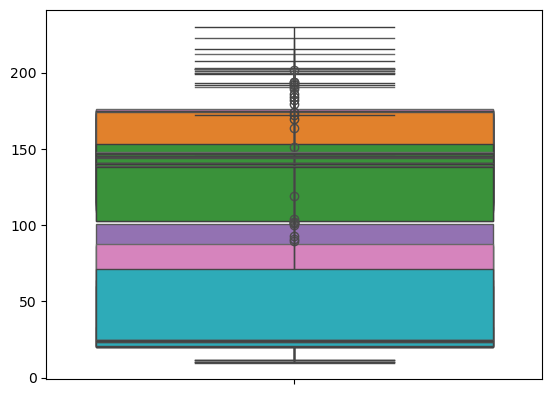

In [25]:
assignment = CS6512Assignment2()
assignment.execute(df, "SOL")   # execute for Phase 1 and Phase 2.

## Execute - Phases 3

Iterate to find a non-empty joint set (all 5 techniques) or else the result of the final interation after the maximum  iterations (100).


Phase 3

Trial 1...
145.07, 145.04, 144.99, 145.04, 145.05, 144.99, 145.05, 145.05, 145.01, 145.01, 144.99, 145.01, 144.99, 145.01, 145.01, 145.01, 145.01, 145.01, 144.97, 145.01, 145.01, 144.97, 145.01, 145, 145, 145, 145, 145, 145, 145.01, 145, 145.01, 144.99, 144.99, 144.99, 145.01, 144.98, 144.99, 144.99, 144.98, 144.98, 144.98, 144.99, 144.99, 145, 144.99, 144.98, 144.99, 144.99, 144.99, 144.99, 144.99, 144.99, 144.99, 144.99, 144.99, 144.99, 144.99, 144.99, 144.93, 144.96, 144.99, 144.95, 144.95, 144.96, 144.93, 144.95, 144.93, 144.95, 144.95, 144.95, 144.95, 144.95, 144.94, 144.95, 144.93, 144.95, 144.93, 144.94, 144.92, 144.92, 144.92, 144.92, 144.92, 144.92, 144.92, 144.92, 144.92, 144.92, 144.92, 144.92, 144.92, 144.94, 144.92, 144.94, 144.92, 144.94, 144.95, 144.95, 144.96, 144.96, 
Collected 101 live prices.

phase_3 - Trial #1 of 100..
Length of the series: 101
Extracting 100 elements at random..
Updated length of the series: 100
Executing DixonQ Enhanced Method...
Shapir

outliers_output_phase_3.json: 100%|██████████| 2.84k/2.84k [00:00<00:00, 34.5kB/s]

\File uploaded to S3 bucket outliers_output_phase_3.json.


True

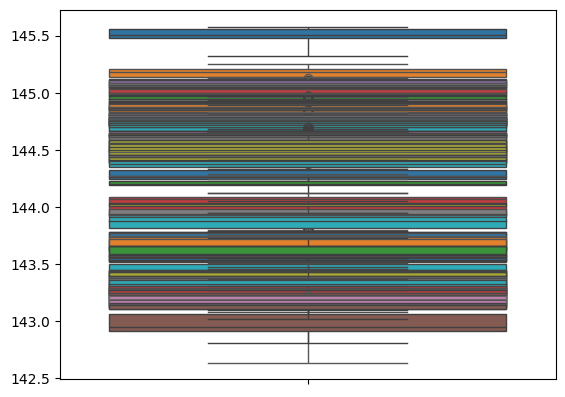

In [ ]:
assignment = CS6512Assignment2()
assignment.executeOnTimer("SOL")

# Results

## Results - Phase 1
Here we show a positive result obtained from running Phase 1 trials, for which the JSON result is supplied in a separate file.

phase_1 - Trial #13 of 100..
Length of the series: 11371
Extracting 100 elements at random..
Length: 100
Updated length of the series: 100
Executing DixonQ Enhanced Method...
Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian
DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.
Outliers DQ: {230.32: 0.95}
Executing Standard Deviation Method...
Outliers StD: [230.32]
Executing Isolation Forest Method...
Outliers IF: [86.52, 87.79, 88.08, 88.63, 91.21, 91.5, 91.51, 92.63, 101.56, 102.82, 108.095, 109.59, 112.89, 113.675, 114.77, 118.4, 118.9, 119.85, 121.78, 135.28, 150.97, 151.87, 157.76, 166.44, 167.48, 168.58, 173.56, 176.86, 177.41, 179.16, 179.82, 182.73, 184.795, 187.47, 189.06, 190.33, 191.2, 193.955, 198.28, 199.51, 200.71, 202.335, 230.32]
Executing Boxplots Method...
Outliers BXPLTS: [230.32]
Executing DBScan Clustering Method...
Outliers DBSCAN_CL: [86.52, 88.63, 94.23, 99.81, 100.37, 102.82, 108.095, 109.59, 112.89, 113.675, 114.77, 119.85, 121.78, 135.28, 144.15, 145.15, 148.5, 149.955, 150.97, 151.87, 157.76, 166.44, 167.48, 168.58, 173.56, 176.86, 177.41, 179.16, 179.82, 182.73, 184.795, 187.47, 189.06, 190.33, 191.2, 193.955, 198.28, 199.51, 200.71, 202.335, 230.32]
**Joint outliers: [230.32]**

***POSITIVE RESULT*** - Found Joint outliers for all 5 methods!
Joint Outliers (all 5 techniques): [230.32]
Joint outliers all technique pairs...
Outliers DQ_StD: [230.32]
Outliers DQ_IF: [230.32]
Outliers DQ_BXPLTS: [230.32]
Outliers DQ_DBSCAN_CL: [230.32]
Outliers StD_IF: [230.32]
Outliers StD_BXPLTS: [230.32]
Outliers StD_DBSCAN_CL: [230.32]
Outliers IF_BXPLTS: [230.32]
Outliers IF_DBSCAN_CL: [135.28, 150.97, 151.87, 157.76, 166.44, 167.48, 168.58, 173.56, 176.86, 177.41, 179.16, 179.82, 182.73, 184.795, 187.47, 189.06, 190.33, 191.2, 193.955, 198.28, 199.51, 200.71, 202.335, 86.52, 88.63, 102.82, 230.32, 108.095, 109.59, 112.89, 113.675, 114.77, 119.85, 121.78]
Outliers BXPLTS_DBSCAN_CL: [230.32]
JSON format:
{'Series_100': [86.52, 87.79, 88.08, 88.63, 91.21, 91.5, 91.51, 92.63, 93.04, 93.43, 93.52, 93.67, 94.23, 95.9, 96.39, 97.17, 97.51, 97.62, 97.93, 98.48, 98.79, 99.81, 100.37, 101.19, 101.56, 102.82, 108.095, 109.59, 112.89, 113.675, 114.77, 115.32, 115.41, 118.4, 118.49, 118.9, 119.85, 121.78, 135.28, 136.325, 136.35, 136.46, 137.17, 137.44, 139.36, 139.82, 139.84, 139.92, 140.38, 140.385, 140.42, 140.53, 141.3, 141.7, 142.26, 142.72, 143.0, 143.04, 143.12, 143.23, 143.49, 143.53, 143.54, 144.15, 145.15, 146.05, 146.48, 146.94, 147.74, 147.82, 147.93, 148.5, 149.955, 150.97, 151.87, 157.76, 166.44, 167.48, 168.58, 169.97, 170.03, 172.28, 172.45, 173.56, 176.86, 177.41, 179.16, 179.82, 182.73, 184.795, 187.47, 189.06, 190.33, 191.2, 193.955, 198.28, 199.51, 200.71, 202.335, 230.32], 'Dixon_Q': [230.32], 'Standard_Deviation': [230.32], 'Isolation_Forest': [86.52, 87.79, 88.08, 88.63, 91.21, 91.5, 91.51, 92.63, 101.56, 102.82, 108.095, 109.59, 112.89, 113.675, 114.77, 118.4, 118.9, 119.85, 121.78, 135.28, 150.97, 151.87, 157.76, 166.44, 167.48, 168.58, 173.56, 176.86, 177.41, 179.16, 179.82, 182.73, 184.795, 187.47, 189.06, 190.33, 191.2, 193.955, 198.28, 199.51, 200.71, 202.335, 230.32], 'Boxplots': [230.32], 'DBSCAN_Clustering': [86.52, 88.63, 94.23, 99.81, 100.37, 102.82, 108.095, 109.59, 112.89, 113.675, 114.77, 119.85, 121.78, 135.28, 144.15, 145.15, 148.5, 149.955, 150.97, 151.87, 157.76, 166.44, 167.48, 168.58, 173.56, 176.86, 177.41, 179.16, 179.82, 182.73, 184.795, 187.47, 189.06, 190.33, 191.2, 193.955, 198.28, 199.51, 200.71, 202.335, 230.32], 'Joint_Outliers': [230.32], 'Joint_Outliers_DQ_StD': [230.32], 'Joint_Outliers_DQ_IF': [230.32], 'Joint_Outliers_DQ_BXPLTS': [230.32], 'Joint_Outliers_DQ_DBSCAN_CL': [230.32], 'Joint_Outliers_StD_IF': [230.32], 'Joint_Outliers_StD_BXPLTS': [230.32], 'Joint_Outliers_StD_DBSCAN_CL': [230.32], 'Joint_Outliers_IF_BXPLTS': [230.32], 'Joint_Outliers_IF_DBSCAN_CL': [135.28, 150.97, 151.87, 157.76, 166.44, 167.48, 168.58, 173.56, 176.86, 177.41, 179.16, 179.82, 182.73, 184.795, 187.47, 189.06, 190.33, 191.2, 193.955, 198.28, 199.51, 200.71, 202.335, 86.52, 88.63, 102.82, 230.32, 108.095, 109.59, 112.89, 113.675, 114.77, 119.85, 121.78], 'Joint_Outliers_BXPLTS_DBSCAN_CL': [230.32]}

Data written to outliers_output_phase_1.json.

## Results - Phase 2
Here we show a positive result obtained from running Phase 2 trials, for which the JSON result is supplied in a separate file.

phase_2 - Trial #7 of 100..
Length of the series: 601
Extracting 100 elements at random..
Updated length of the series: 100
Executing DixonQ Enhanced Method...
Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian
DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.
Outliers DQ: {172.32: 0.79}
Executing Standard Deviation Method...
Outliers StD: [172.32, 190.47, 192.19]
Executing Isolation Forest Method...
Outliers IF: [9.99, 11.33, 32.33, 33.39, 34.05, 38.43, 51.66, 56.3, 56.72, 57.57, 67.78, 70.77, 73.02, 74.81, 92.23, 93.59, 95.84, 97.78, 101.69, 105.02, 106.19, 108.96, 109.97, 110.02, 126.68, 130.89, 136.27, 138.59, 144.07, 145.11, 148.78, 148.87, 172.32, 190.47, 192.19]
Executing Boxplots Method...
Outliers BXPLTS: [148.78, 148.87, 172.32, 190.47, 192.19]
Executing DBScan Clustering Method...
Outliers DBSCAN_CL: [9.99, 15.43, 17.24, 23.37, 27.43, 32.33, 33.39, 34.05, 38.43, 51.66, 57.57, 67.78, 70.77, 73.02, 74.81, 92.23, 93.59, 95.84, 97.78, 105.02, 106.19, 108.96, 126.68, 130.89, 136.27, 138.59, 144.07, 145.11, 172.32, 190.47, 192.19]
**Joint outliers: [172.32]**

***POSITIVE RESULT*** - Found Joint outliers for all 5 methods!
Joint Outliers (all 5 techniques): [172.32]
Joint outliers all technique pairs...
Outliers DQ_StD: [172.32]
Outliers DQ_IF: [172.32]
Outliers DQ_BXPLTS: [172.32]
Outliers DQ_DBSCAN_CL: [172.32]
Outliers StD_IF: [192.19, 172.32, 190.47]
Outliers StD_BXPLTS: [192.19, 172.32, 190.47]
Outliers StD_DBSCAN_CL: [192.19, 172.32, 190.47]
Outliers IF_BXPLTS: [192.19, 172.32, 148.87, 148.78, 190.47]
Outliers IF_DBSCAN_CL: [130.89, 136.27, 9.99, 138.59, 144.07, 145.11, 32.33, 33.39, 34.05, 38.43, 172.32, 51.66, 57.57, 190.47, 192.19, 67.78, 70.77, 73.02, 74.81, 92.23, 93.59, 95.84, 97.78, 105.02, 106.19, 108.96, 126.68]
Outliers BXPLTS_DBSCAN_CL: [192.19, 172.32, 190.47]
JSON format:
{'Series_100': [9.99, 11.33, 11.78, 11.94, 13.39, 13.43, 13.69, 13.82, 14.12, 14.17, 14.27, 14.59, 15.43, 16.37, 16.66, 17.24, 19.14, 19.48, 19.61, 19.64, 19.72, 20.04, 20.34, 20.45, 20.45, 20.53, 20.55, 20.79, 20.94, 20.99, 21.26, 21.46, 21.47, 21.74, 21.79, 21.8, 21.82, 21.89, 22.0, 22.01, 22.1, 22.62, 22.79, 23.37, 23.92, 23.93, 23.95, 24.17, 24.22, 24.32, 24.36, 24.37, 24.46, 24.52, 24.76, 24.85, 25.36, 25.37, 26.02, 26.31, 27.43, 28.85, 29.33, 30.85, 30.88, 32.33, 33.39, 34.05, 38.43, 51.66, 56.3, 56.72, 57.57, 67.78, 70.77, 73.02, 74.81, 92.23, 93.59, 95.84, 97.78, 101.69, 101.85, 101.9, 105.02, 106.19, 108.96, 109.97, 110.02, 126.68, 130.89, 136.27, 138.59, 144.07, 145.11, 148.78, 148.87, 172.32, 190.47, 192.19], 'Dixon_Q': [172.32], 'Standard_Deviation': [172.32, 190.47, 192.19], 'Isolation_Forest': [9.99, 11.33, 32.33, 33.39, 34.05, 38.43, 51.66, 56.3, 56.72, 57.57, 67.78, 70.77, 73.02, 74.81, 92.23, 93.59, 95.84, 97.78, 101.69, 105.02, 106.19, 108.96, 109.97, 110.02, 126.68, 130.89, 136.27, 138.59, 144.07, 145.11, 148.78, 148.87, 172.32, 190.47, 192.19], 'Boxplots': [148.78, 148.87, 172.32, 190.47, 192.19], 'DBSCAN_Clustering': [9.99, 15.43, 17.24, 23.37, 27.43, 32.33, 33.39, 34.05, 38.43, 51.66, 57.57, 67.78, 70.77, 73.02, 74.81, 92.23, 93.59, 95.84, 97.78, 105.02, 106.19, 108.96, 126.68, 130.89, 136.27, 138.59, 144.07, 145.11, 172.32, 190.47, 192.19], 'Joint_Outliers': [172.32], 'Joint_Outliers_DQ_StD': [172.32], 'Joint_Outliers_DQ_IF': [172.32], 'Joint_Outliers_DQ_BXPLTS': [172.32], 'Joint_Outliers_DQ_DBSCAN_CL': [172.32], 'Joint_Outliers_StD_IF': [192.19, 172.32, 190.47], 'Joint_Outliers_StD_BXPLTS': [192.19, 172.32, 190.47], 'Joint_Outliers_StD_DBSCAN_CL': [192.19, 172.32, 190.47], 'Joint_Outliers_IF_BXPLTS': [192.19, 172.32, 148.87, 148.78, 190.47], 'Joint_Outliers_IF_DBSCAN_CL': [130.89, 136.27, 9.99, 138.59, 144.07, 145.11, 32.33, 33.39, 34.05, 38.43, 172.32, 51.66, 57.57, 190.47, 192.19, 67.78, 70.77, 73.02, 74.81, 92.23, 93.59, 95.84, 97.78, 105.02, 106.19, 108.96, 126.68], 'Joint_Outliers_BXPLTS_DBSCAN_CL': [192.19, 172.32, 190.47]}

Data written to outliers_output_phase_2.json.

## Results - Phase 3 
Here we show a negative result obtained from running the maximum number of Phase 3 trials. However we can also observe that trials resulted in what would have contained joint outlier results from all techniques except for DBSCAN results.

phase_3 - Trial #100 of 100..
Length of the series: 101
Extracting 100 elements at random..
Updated length of the series: 100
Executing DixonQ Enhanced Method...
Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian
DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.
Outliers DQ: {}
Executing Standard Deviation Method...
Outliers StD: [143.43, 143.43, 143.43, 143.43, 143.46, 143.46]
Executing Isolation Forest Method...
Outliers IF: [143.32, 143.32, 143.32, 143.32, 143.32, 143.32, 143.34, 143.34, 143.34, 143.34, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.39, 143.4, 143.4, 143.41, 143.43, 143.43, 143.43, 143.43, 143.46, 143.46]
Executing Boxplots Method...
Outliers BXPLTS: [143.46, 143.46]
Executing DBScan Clustering Method...
Outliers DBSCAN_CL: []
**Joint outliers: []**

***NEGATIVE RESULT*** - Failed to find non-empty set of Joint outliers for all 5 methods!
Joint Outliers (all 5 techniques): []
Joint outliers all technique pairs...
Outliers DQ_StD: []
Outliers DQ_IF: []
Outliers DQ_BXPLTS: []
Outliers DQ_DBSCAN_CL: []
Outliers StD_IF: [143.43, 143.46]
Outliers StD_BXPLTS: [143.46]
Outliers StD_DBSCAN_CL: []
Outliers IF_BXPLTS: [143.46]
Outliers IF_DBSCAN_CL: []
Outliers BXPLTS_DBSCAN_CL: []
JSON format:
{'Series_100': [143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.31, 143.32, 143.32, 143.32, 143.32, 143.32, 143.32, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.33, 143.34, 143.34, 143.34, 143.34, 143.35, 143.35, 143.35, 143.35, 143.35, 143.35, 143.35, 143.35, 143.35, 143.35, 143.35, 143.35, 143.35, 143.35, 143.35, 143.36, 143.36, 143.36, 143.36, 143.36, 143.36, 143.36, 143.36, 143.36, 143.36, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.39, 143.4, 143.4, 143.41, 143.43, 143.43, 143.43, 143.43, 143.46, 143.46], 'Dixon_Q': [], 'Standard_Deviation': [143.43, 143.43, 143.43, 143.43, 143.46, 143.46], 'Isolation_Forest': [143.32, 143.32, 143.32, 143.32, 143.32, 143.32, 143.34, 143.34, 143.34, 143.34, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.37, 143.39, 143.4, 143.4, 143.41, 143.43, 143.43, 143.43, 143.43, 143.46, 143.46], 'Boxplots': [143.46, 143.46], 'DBSCAN_Clustering': [], 'Joint_Outliers': [], 'Joint_Outliers_DQ_StD': [], 'Joint_Outliers_DQ_IF': [], 'Joint_Outliers_DQ_BXPLTS': [], 'Joint_Outliers_DQ_DBSCAN_CL': [], 'Joint_Outliers_StD_IF': [143.43, 143.46], 'Joint_Outliers_StD_BXPLTS': [143.46], 'Joint_Outliers_StD_DBSCAN_CL': [], 'Joint_Outliers_IF_BXPLTS': [143.46], 'Joint_Outliers_IF_DBSCAN_CL': [], 'Joint_Outliers_BXPLTS_DBSCAN_CL': []}

Data written to outliers_output_phase_3.json.